In this notebook we play with different option to visualize the performance of the model. One key plot we used so far is the 95% 2D histogram. In that plot the colorbar is used to indicate the density of the points. 

A problem of such visualization is that it tends to be antintuitive as something that should be ignored (e.g. a larger uncertainty on pixels as rare as 1 in 10mln) appears as the most evident feature of the plot. Also, the color scale applied to the normalized pixel density is not something that a reader can quickly interpret in asbolute terms.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sdo.viz.plot_vt_outputs import plot_2Dhist_95cl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_inventory =  '/home/Valentina/inventory_1904.pkl'
results_path = '/home/Valentina/results/'

In [23]:
# For details about how these predictions have been calculated refer to the the notebook 
# flares/experiments/02_train_on_flares.ipynb
pred20_on20 = results_path + '0600_test20_on20_test_predictions.npy'

Y = np.load(pred20_on20)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]

### 2D histogram - 95 c.l.

We start by reproducing the plot that we used so far

/home/Valentina/expanding-sdo-capabilities/src/sdo/viz/plot_vt_outputs.py:97: RuntimeWarning: divide by zero encountered in log10
  H, xedges, yedges = np.histogram2d(np.log10(Y_test.flatten()),
/home/Valentina/expanding-sdo-capabilities/src/sdo/viz/plot_vt_outputs.py:98: RuntimeWarning: divide by zero encountered in log10
  np.log10(Y_pred.flatten()),
/home/Valentina/expanding-sdo-capabilities/src/sdo/viz/plot_vt_outputs.py:117: RuntimeWarning: invalid value encountered in true_divide
  Hcum[:,i]=H[:,i].cumsum(axis=0)/H[:,i].sum()


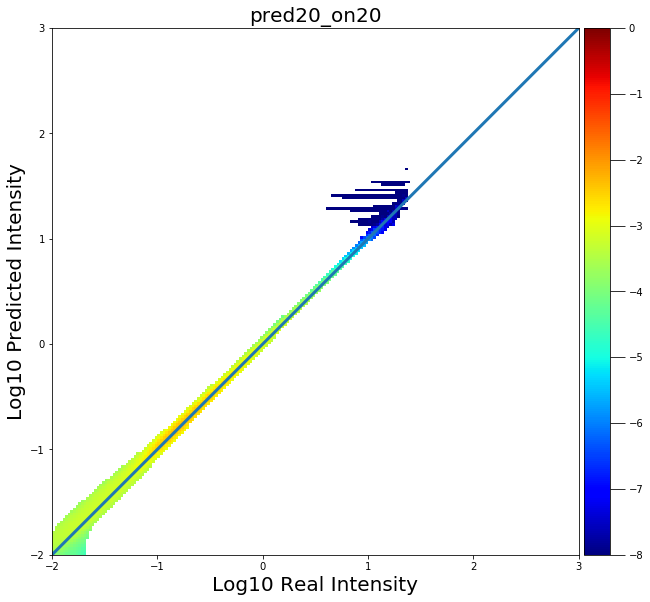

In [4]:
plot_2Dhist_95cl(Y_test,Y_pred, mask_by_confidence=True, title='pred20_on20')

### 3D histogram

In [10]:
bins = 200
xy_range = [[-2,3.0],[-2,3.0]] 
H, xedges, yedges = np.histogram2d(np.log10(Y_test.flatten()), 
                                   np.log10(Y_pred.flatten()), 
                                   bins=bins, range=xy_range, normed=False)
Hnorm = H/H.sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [21]:
# Construct arrays for the anchor positions .
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = Hnorm.ravel()*100

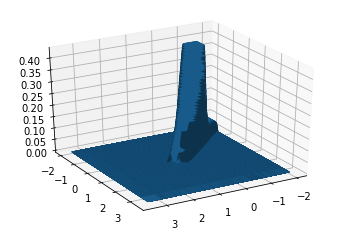

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.azim = 60

plt.show()

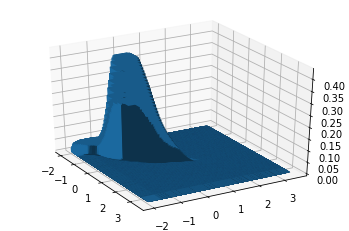

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.azim = -30

plt.show()

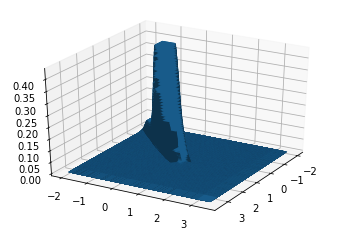

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.azim = 30

plt.show()

Really hard to visualize and interpret, let's drop for now

### 1D histogram

In [4]:
Y_test.shape

(667, 1, 512, 512)

In [5]:
(Y_test.flatten() > 0).shape, (Y_pred.flatten() > 0).shape

((174850048,), (174850048,))

In [6]:
len(Y_test.flatten()), len(Y_pred.flatten())

(174850048, 174850048)

In [24]:
log_Y_test = np.log10(Y_test.flatten())
log_Y_pred = np.log10(Y_pred.flatten())
idx = np.argsort(log_Y_test)
log_Y_test = log_Y_test[idx]
log_Y_pred = log_Y_pred[idx]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [25]:
log_Y_test[0], log_Y_pred[0]

(-inf, -2.2776463)

In [26]:
mask = log_Y_test > log_Y_test[0] # -inf
log_Y_test = log_Y_test[mask]
log_Y_pred = log_Y_pred[mask]
len(log_Y_test)

174846429

In [27]:
log_Y_pred[0]

-inf

In [28]:
mask2 = log_Y_pred > log_Y_pred[0] #-inf
log_Y_test = log_Y_test[mask2]
log_Y_pred = log_Y_pred[mask2]
len(log_Y_test)

173883213

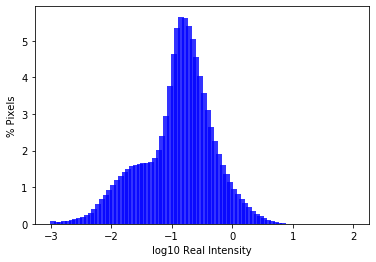

In [55]:
bins = 80
xrange = [-3,2.0]
width = 0.1
y, binEdges = np.histogram(log_Y_test, bins=bins, range=xrange)
ynorm = y/len(log_Y_test)*100
bincenters = 0.5*(binEdges[1:] + binEdges[:-1])
plt.bar(bincenters, ynorm, width=width, color='b', alpha=0.8)
plt.xlabel('log10 Real Intensity')
plt.ylabel('% Pixels')
plt.show()

In [56]:
binEdges[1]

-2.9375

In [57]:
i=0
bins=[]
for val in log_Y_test:
    if val < binEdges[i+1]:
        bins.append(i)
    else:
        i=i+1
        bins.append(i)

In [64]:
len(bincenters)

80

In [31]:
df = pd.DataFrame({'Bins':bins, 'YTest':log_Y_test,'YPred':log_Y_pred})
df['YTest-YPred'] = df.YTest - df.YPred

In [87]:
df['binCenter'] = df.apply(lambda x: x["Bins"], axis=1)

MemoryError: Unable to allocate array with shape (4, 173883213) and data type float64

In [33]:
df.head(10)

,Bins,YTest,YPred,YTest-YPred
0,0,-4.639112,-2.410336,-2.228776
1,0,-4.639112,-3.162072,-1.477039
2,0,-4.639111,-2.585733,-2.053378
3,0,-4.639111,-2.549779,-2.089332
4,0,-4.639111,-2.849087,-1.790024
5,0,-4.639111,-2.320782,-2.318329
6,0,-4.639111,-3.221331,-1.417779
7,0,-4.639111,-2.704612,-1.934498
8,0,-4.639111,-2.926969,-1.712142
9,0,-4.639111,-2.619962,-2.019148


In [13]:
# df.YTest[0] corresponds to -inf. Dropping cases where test ore pred is -inf because it creates issues with the quantiles computation
# df = df[df['YTest-YPred'] != df.YTest[0]]
# df = df.dropna()

In [34]:
qdf = df[['Bins','YTest-YPred']].groupby('Bins').quantile([0.05, 0.5, 0.95]).unstack()

In [35]:
qdf.head(10)

YTest-YPred                    
            0.05      0.50      0.95
Bins                                
0      -1.162944 -0.606644  0.058314
1      -0.807834 -0.527443  0.002565
2      -0.784160 -0.550538 -0.120006
3      -0.754798 -0.548790 -0.195093
4      -0.721344 -0.537078 -0.200684
5      -0.690971 -0.520985 -0.182592
6      -0.662101 -0.504107 -0.153744
7      -0.634627 -0.485837 -0.119518
8      -0.609914 -0.465577 -0.071079
9      -0.584775 -0.440428 -0.026499

In [107]:
qdf = qdf.reset_index()['YTest-YPred']

In [36]:
qdf.head(10)

YTest-YPred                    
            0.05      0.50      0.95
Bins                                
0      -1.162944 -0.606644  0.058314
1      -0.807834 -0.527443  0.002565
2      -0.784160 -0.550538 -0.120006
3      -0.754798 -0.548790 -0.195093
4      -0.721344 -0.537078 -0.200684
5      -0.690971 -0.520985 -0.182592
6      -0.662101 -0.504107 -0.153744
7      -0.634627 -0.485837 -0.119518
8      -0.609914 -0.465577 -0.071079
9      -0.584775 -0.440428 -0.026499

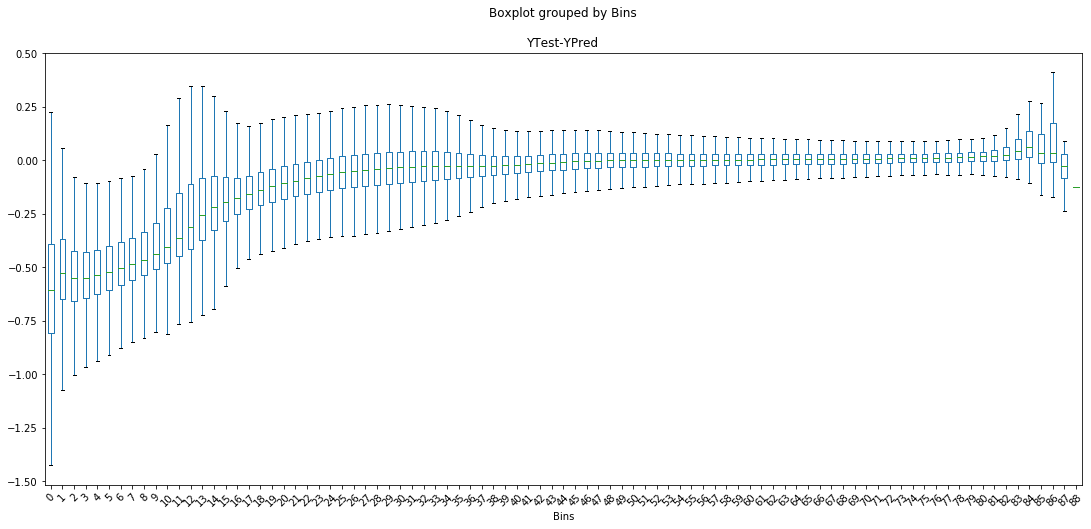

In [50]:
df.boxplot('YTest-YPred', by='Bins', showfliers=False, grid=False, rot=45, figsize=(18, 8))

In [74]:
err = qdf.reset_index()['YTest-YPred'].to_numpy()

In [75]:
err.shape

(89, 2)

In [76]:
len(ynorm)

100

In [77]:
pad_err = np.zeros([2, len(ynorm)])

In [78]:
err = err.T

In [79]:
pad_err[:err.shape[0], :err.shape[1]] = err

In [80]:
pad_err[0][:10], pad_err[1][:10]

(array([-1.16294408, -0.80783429, -0.78415966, -0.75479827, -0.72134359,
        -0.69097137, -0.66210091, -0.6346271 , -0.60991357, -0.58477451]),
 array([ 0.05831361,  0.00256493, -0.12000573, -0.19509339, -0.20068386,
        -0.18259239, -0.15374353, -0.11951828, -0.07107893, -0.02649879]))

In [54]:
ynorm[:10]

array([0.66453511, 0.71972043, 0.77173522, 0.82019131, 0.86806597,
       0.9107843 , 0.94839287, 0.97993186, 1.00430626, 1.02166849])

In [81]:
pad_err[0] = ynorm - pad_err[0]
pad_err[1] = pad_err[0] - ynorm

<BarContainer object of 100 artists>

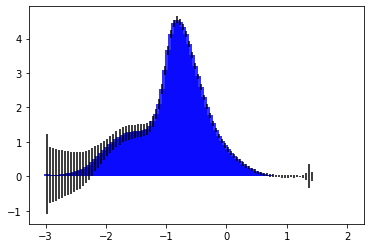

In [84]:
plt.bar(bincenters, ynorm, width=width, color='b', yerr=pad_err[1], alpha=0.8)

<BarContainer object of 100 artists>

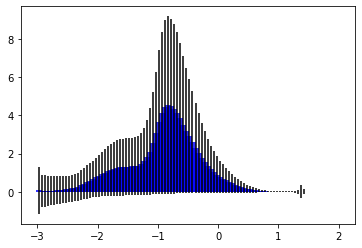

In [85]:
plt.bar(bincenters, ynorm, width=width, color='b', yerr=pad_err[0], alpha=0.8)

<BarContainer object of 100 artists>

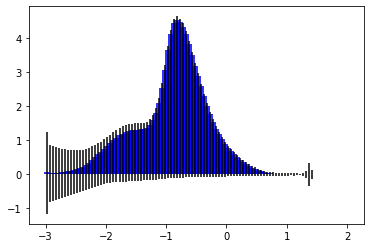

In [86]:
plt.bar(bincenters, ynorm, width=width, color='b', yerr=pad_err, alpha=0.8)

In [57]:
pad_err[0][:10], pad_err[1][:10]

(array([95.22320879, 25.49562976, 24.78544537, 24.22044466, 23.72177767,
        23.23643734, 22.83313984, 22.46035397, 22.07785212, 21.66586417]),
 array([94.56208229, 24.7797066 , 24.01785851, 23.40473771, 22.85849452,
        22.33068466, 21.88998997, 21.48584008, 21.07909918, 20.649845  ]))

In [58]:
ynorm[:10]

array([0.6611265 , 0.71592317, 0.76758686, 0.81570695, 0.86328315,
       0.90575268, 0.94314987, 0.97451389, 0.99875294, 1.01601917])

In [ ]:
pad_err = pad_err*100